In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)


{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Classification
classifier = RandomForestClassifier(n_estimators=40, random_state=0)
classifier.fit(X_train, y_train)

# Prediction
y_pred = classifier.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("----------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))
print("----------------")

print("Accuracy:")
print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 112   0   0   0   0   0   0   0   1]
 [  0   0 110   0   0   0   1   1   0   0]
 [  0   0   2 109   0   0   0   0   1   1]
 [  0   0   0   0  97   0   0   1   0   2]
 [  0   0   0   1   0 117   0   0   1   2]
 [  0   1   0   0   1   0 120   0   0   0]
 [  0   0   0   0   1   0   0 121   0   0]
 [  0   0   0   1   0   0   0   0  96   1]
 [  0   0   0   2   1   0   0   1   0  89]]
----------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       0.99      0.99      0.99       113
           2       0.98      0.98      0.98       112
           3       0.96      0.96      0.96       113
           4       0.97      0.97      0.97       100
           5       1.00      0.97      0.98       121
           6       0.99      0.98      0.99       122
           7       0.98      0.99      0.98       122
           8       0.98

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Baseline SVM (Linear) ===
Accuracy: 0.9777580071174378
Precision: 0.9780152278466728
Recall: 0.9777876548282929
F1-Score: 0.9777761288612675

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       111
           1       0.94      0.96      0.95       114
           2       1.00      0.99      1.00       111
           3       0.99      0.99      0.99       114
           4       0.97      0.97      0.97       114
           5       0.99      0.99      0.99       112
           6       1.00      0.98      0.99       112
           7       1.00      0.99      1.00       113
           8       0.94      0.98      0.96       111
           9       0.95      0.91      0.93       112

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



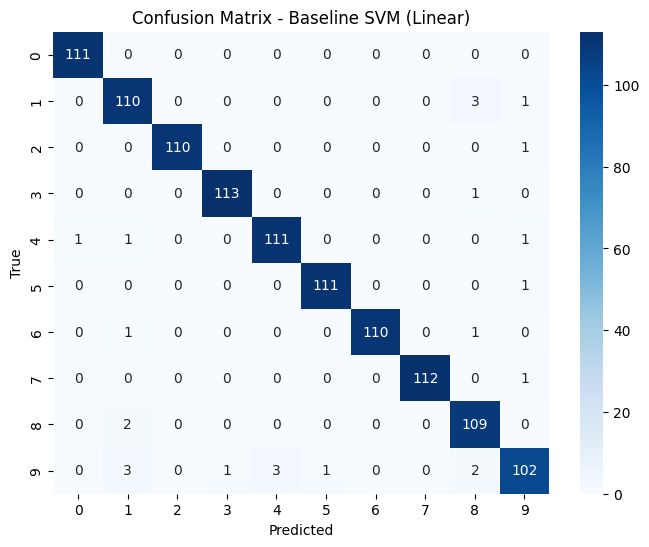

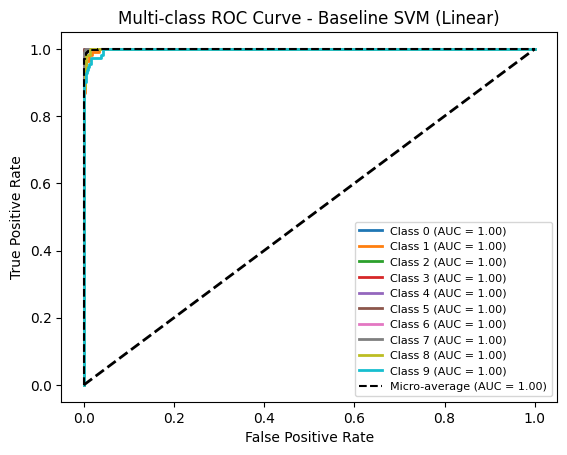

In [ ]:
digits = fetch_ucirepo(id=80)  # Handwritten digits dataset
X = digits.data.features
y = digits.data.targets.astype(int)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ------------------------------
# 1. Baseline SVM (Linear Kernel)
# ------------------------------
svm_linear = SVC(kernel='linear', probability=True, random_state=0)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

print("=== Baseline SVM (Linear) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ------------------------------
# Confusion Matrix Heatmap
# ------------------------------
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Baseline SVM (Linear)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------
# Multi-class ROC–AUC Curve
# ------------------------------
y_score = svm_linear.predict_proba(X_test)
classes = np.unique(y)

# One-vs-Rest binarization
y_bin = label_binarize(y_test, classes=classes)

fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

# Micro-average ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"], linestyle="--", color="black",
         label=f"Micro-average (AUC = {roc_auc['micro']:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve - Baseline SVM (Linear)")
plt.legend(loc="lower right", fontsize=8)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Baseline SVM (Polynomial) ===
Accuracy: 0.9795373665480427
Precision: 0.9805830817611232
Recall: 0.9795496611955624
F1-Score: 0.9797312178742722

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       111
           1       0.97      0.98      0.97       114
           2       1.00      0.98      0.99       111
           3       0.98      0.98      0.98       114
           4       1.00      0.97      0.99       114
           5       0.99      0.99      0.99       112
           6       1.00      0.96      0.98       112
           7       1.00      0.99      1.00       113
           8       0.89      0.99      0.94       111
           9       0.97      0.95      0.96       112

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



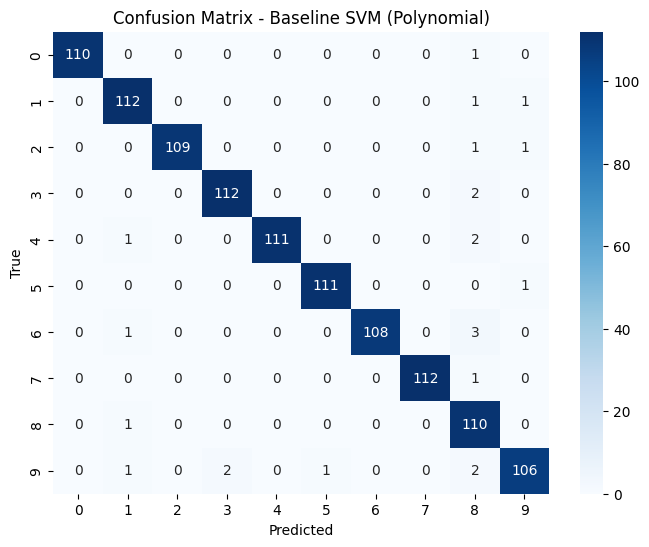

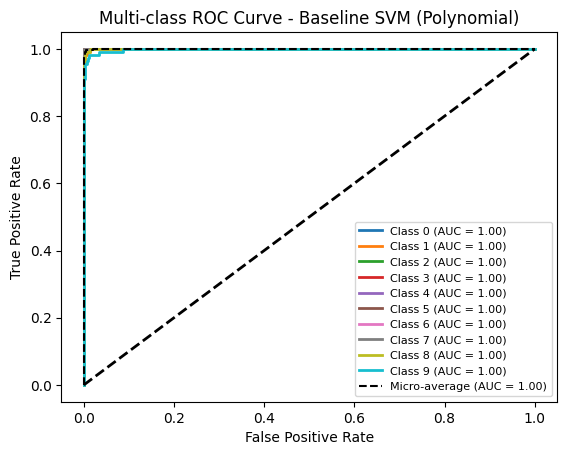

In [ ]:
# 1. Baseline SVM (Polynomial Kernel)
# ------------------------------
svm_poly = SVC(kernel='poly', probability=True, random_state=0)
svm_poly.fit(X_train, y_train)
y_pred = svm_poly.predict(X_test)

print("=== Baseline SVM (Polynomial) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ------------------------------
# Confusion Matrix Heatmap
# ------------------------------
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Baseline SVM (Polynomial)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------
# Multi-class ROC–AUC Curve
# ------------------------------
y_score = svm_poly.predict_proba(X_test)
classes = np.unique(y)

# One-vs-Rest binarization
y_bin = label_binarize(y_test, classes=classes)

fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

# Micro-average ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"], linestyle="--", color="black",
         label=f"Micro-average (AUC = {roc_auc['micro']:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve - Baseline SVM (Polynomial)")
plt.legend(loc="lower right", fontsize=8)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Baseline SVM (Sigmoid) ===
Accuracy: 0.9288256227758007
Precision: 0.9307284179776756
Recall: 0.9289925101260685
F1-Score: 0.9292463313185418

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       111
           1       0.86      0.88      0.87       114
           2       0.88      0.95      0.91       111
           3       0.99      0.97      0.98       114
           4       0.84      0.91      0.87       114
           5       0.95      0.94      0.94       112
           6       0.99      0.97      0.98       112
           7       0.93      0.88      0.91       113
           8       0.92      0.95      0.93       111
           9       0.94      0.85      0.89       112

    accuracy                           0.93      1124
   macro avg       0.93      0.93      0.93      1124
weighted avg       0.93      0.93      0.93      1124



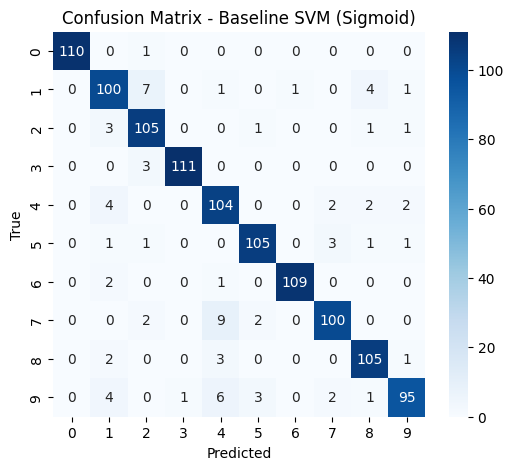

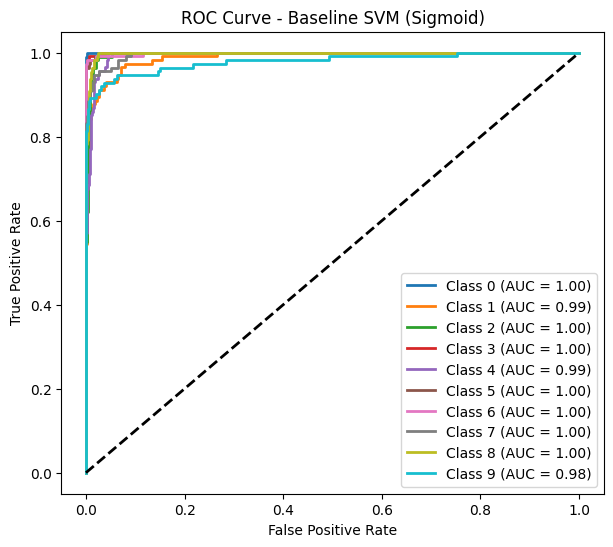

In [ ]:
svm_sigmoid = SVC(kernel='sigmoid', probability=True, random_state=0)
svm_sigmoid.fit(X_train, y_train)
y_pred = svm_sigmoid.predict(X_test)

print("=== Baseline SVM (Sigmoid) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ------------------------------
# Confusion Matrix Heatmap
# ------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Baseline SVM (Sigmoid)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------
# ROC Curve and AUC
# ------------------------------
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

# Get probability scores
y_score = svm_sigmoid.predict_proba(X_test)

plt.figure(figsize=(7,6))

if len(classes) == 2:
    # Binary classification
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.2f}")
else:
    # Multiclass ROC
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Baseline SVM (Sigmoid)")
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Baseline MLP (Momentum=0.9) ===
Accuracy: 0.9804270462633452
Precision: 0.9806610016550884
Recall: 0.9804028652712864
F1-Score: 0.980408304181504

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       111
           1       0.95      0.97      0.96       114
           2       0.99      0.98      0.99       111
           3       0.97      1.00      0.99       114
           4       0.99      0.97      0.98       114
           5       0.97      0.99      0.98       112
           6       1.00      0.98      0.99       112
           7       0.99      1.00      1.00       113
           8       0.97      0.96      0.97       111
           9       0.98      0.94      0.96       112

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



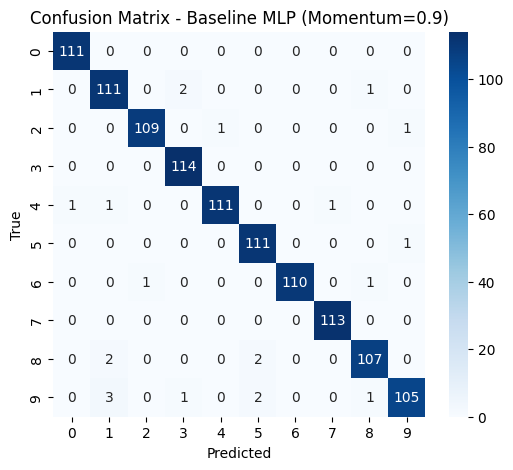

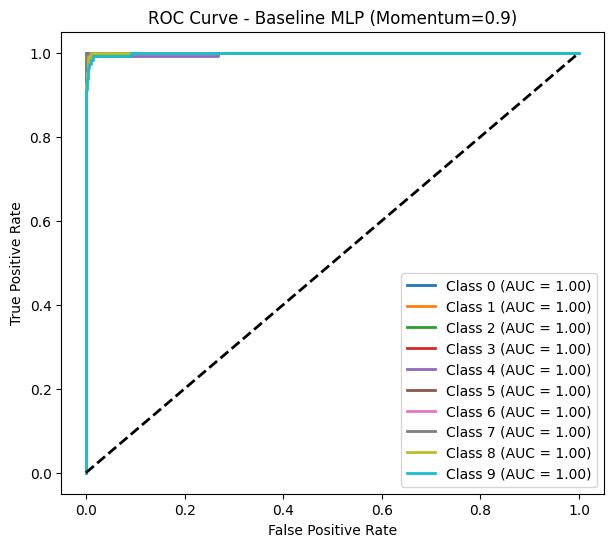

In [ ]:
# ------------------------------
# 1. Baseline MLP (default momentum=0.9)
# ------------------------------
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print("=== Baseline MLP (Momentum=0.9) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ------------------------------
# Confusion Matrix Heatmap
# ------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Baseline MLP (Momentum=0.9)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------
# ROC Curve and AUC
# ------------------------------
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

# Get probability scores
y_score = mlp.predict_proba(X_test)

plt.figure(figsize=(7,6))

if len(classes) == 2:
    # Binary classification
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.2f}")
else:
    # Multiclass ROC
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Baseline MLP (Momentum=0.9)")
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Baseline MLP (Epochs=200) ===
Accuracy: 0.9804270462633452
Precision: 0.9806610016550884
Recall: 0.9804028652712864
F1-Score: 0.980408304181504

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       111
           1       0.95      0.97      0.96       114
           2       0.99      0.98      0.99       111
           3       0.97      1.00      0.99       114
           4       0.99      0.97      0.98       114
           5       0.97      0.99      0.98       112
           6       1.00      0.98      0.99       112
           7       0.99      1.00      1.00       113
           8       0.97      0.96      0.97       111
           9       0.98      0.94      0.96       112

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



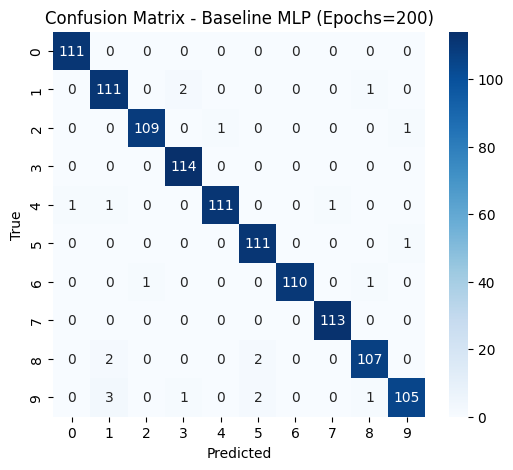

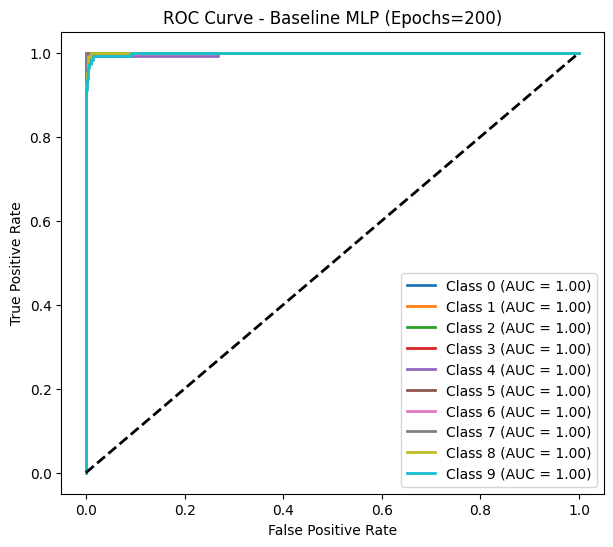

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print("=== Baseline MLP (Epochs=200) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ------------------------------
# Confusion Matrix Heatmap
# ------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Baseline MLP (Epochs=200)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------
# ROC Curve and AUC
# ------------------------------
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

# Get probability scores
y_score = mlp.predict_proba(X_test)

plt.figure(figsize=(7,6))

if len(classes) == 2:
    # Binary classification
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.2f}")
else:
    # Multiclass ROC
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Baseline MLP (Epochs=200)")
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Baseline MLP (Learning rate=0.001) ===
Accuracy: 0.9804270462633452
Precision: 0.9806610016550884
Recall: 0.9804028652712864
F1-Score: 0.980408304181504

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       111
           1       0.95      0.97      0.96       114
           2       0.99      0.98      0.99       111
           3       0.97      1.00      0.99       114
           4       0.99      0.97      0.98       114
           5       0.97      0.99      0.98       112
           6       1.00      0.98      0.99       112
           7       0.99      1.00      1.00       113
           8       0.97      0.96      0.97       111
           9       0.98      0.94      0.96       112

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



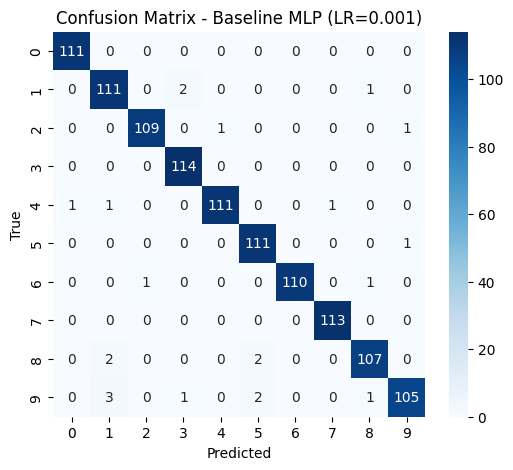

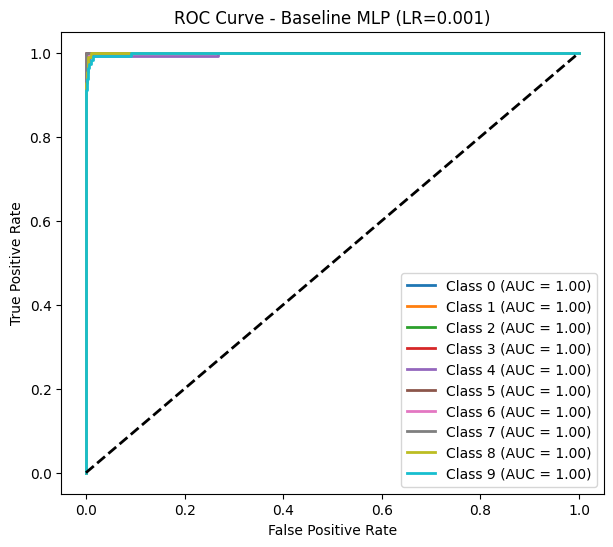

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=0, learning_rate_init=0.001)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print("=== Baseline MLP (Learning rate=0.001) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ------------------------------
# Confusion Matrix Heatmap
# ------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Baseline MLP (LR=0.001)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------
# ROC Curve and AUC
# ------------------------------
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

# Get probability scores
y_score = mlp.predict_proba(X_test)

plt.figure(figsize=(7,6))

if len(classes) == 2:
    # Binary classification
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.2f}")
else:
    # Multiclass ROC
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Baseline MLP (LR=0.001)")
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


=== Baseline Random Forest ===
Accuracy: 0.9839857651245552
Precision: 0.9841332579814865
Recall: 0.9839670967960442
F1-Score: 0.9839630220621572

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       111
           1       0.96      0.99      0.97       114
           2       1.00      0.99      1.00       111
           3       0.98      1.00      0.99       114
           4       1.00      0.97      0.99       114
           5       0.99      0.98      0.99       112
           6       0.99      0.98      0.99       112
           7       0.98      1.00      0.99       113
           8       0.98      0.98      0.98       111
           9       0.96      0.94      0.95       112

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



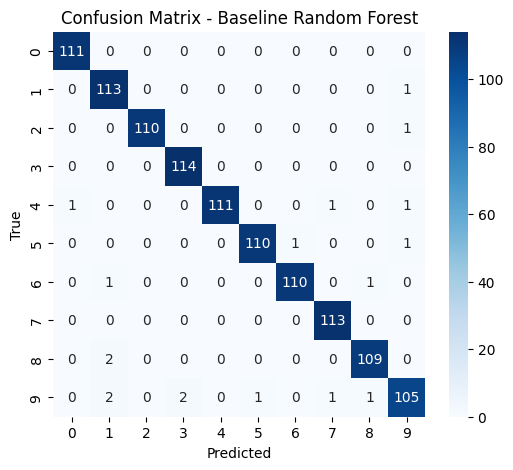

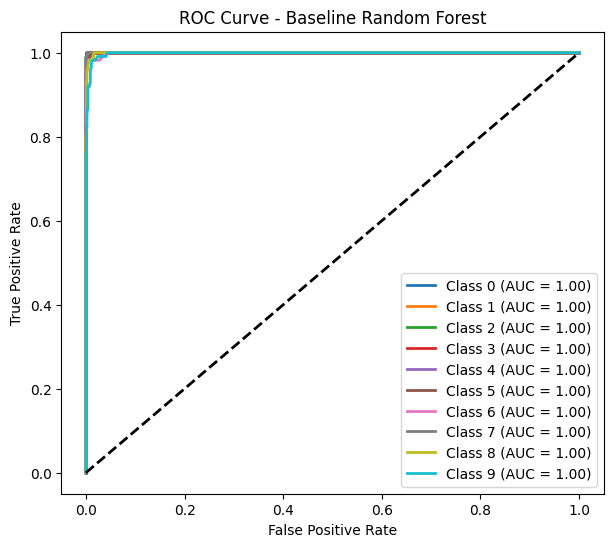

In [ ]:
# ------------------------------
# 1. Baseline Random Forest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("=== Baseline Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ------------------------------
# Confusion Matrix Heatmap
# ------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Baseline Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------
# ROC Curve and AUC
# ------------------------------
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

# Get probability scores
y_score = rf.predict_proba(X_test)

plt.figure(figsize=(7,6))

if len(classes) == 2:
    # Binary classification
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.2f}")
else:
    # Multiclass ROC
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Baseline Random Forest")
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

      Classifier Train-Test Split  Accuracy  Precision    Recall  F1-Score
0  Random Forest            50:50  0.980783   0.980637  0.980653  0.980596
1   SVM (Linear)            50:50  0.975445   0.975514  0.975186  0.975236
2  Random Forest            60:40  0.980872   0.980679  0.980531  0.980558
3   SVM (Linear)            60:40  0.978648   0.978576  0.978321  0.978347
4  Random Forest            70:30  0.985172   0.984991  0.984544  0.984688
5   SVM (Linear)            70:30  0.983986   0.983596  0.983594  0.983488
6  Random Forest            80:20  0.983096   0.982052  0.982182  0.981981
7   SVM (Linear)            80:20  0.983096   0.982095  0.982128  0.982061


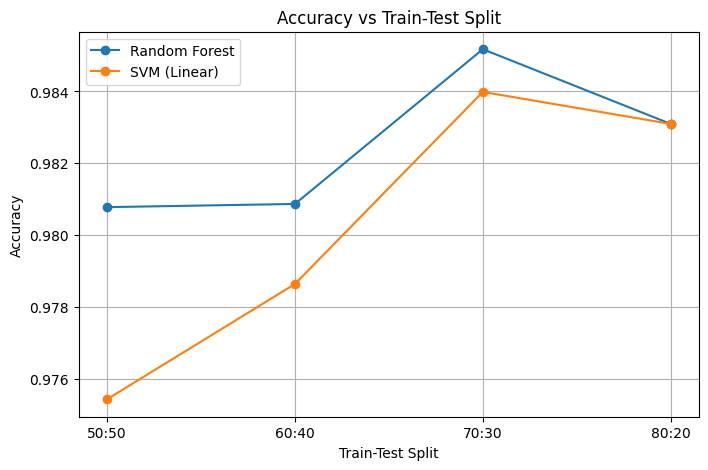

In [ ]:
digits = fetch_ucirepo(id=80)  # Optical recognition of handwritten digits
X = digits.data.features
y = digits.data.targets.astype(int)

# --- Classifiers to compare ---
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "SVM (Linear)": SVC(kernel="linear", random_state=0)
}

# --- Train-test splits to try ---
splits = [0.5, 0.4, 0.3, 0.2]   # test sizes → 50:50, 60:40, 70:30, 80:20

results = []

for test_size in splits:
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=0
    )

    # Scale features
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    for clf_name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        results.append({
            "Classifier": clf_name,
            "Train-Test Split": f"{int((1-test_size)*100)}:{int(test_size*100)}",
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, average="macro"),
            "Recall": recall_score(y_test, y_pred, average="macro"),
            "F1-Score": f1_score(y_test, y_pred, average="macro")
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# --- Plot Accuracy Comparison ---
plt.figure(figsize=(8,5))
for clf_name in results_df["Classifier"].unique():
    subset = results_df[results_df["Classifier"] == clf_name]
    plt.plot(subset["Train-Test Split"], subset["Accuracy"], marker='o', label=clf_name)

plt.title("Accuracy vs Train-Test Split")
plt.xlabel("Train-Test Split")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
splits = [0.5, 0.4, 0.3, 0.2]   # corresponds to 50:50, 60:40, 70:30, 80:20

results = []

for split in splits:
    print(f"\n================ Train-Test Split {int((1-split)*100)}:{int(split*100)} ================\n")

    # Train-Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=0, stratify=y)

    # Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Define classifiers
    classifiers = {
        # --- SVM Variants ---
        "SVM (Linear)": SVC(kernel="linear", random_state=0),
        "SVM (Polynomial)": SVC(kernel="poly", degree=3, random_state=0),
        "SVM (Gaussian/RBF)": SVC(kernel="rbf", random_state=0),
        "SVM (Sigmoid)": SVC(kernel="sigmoid", random_state=0),

        # --- MLP Variants ---
        "MLP (Momentum=0.9)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, momentum=0.9, random_state=0),
        "MLP (Epochs=1000)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=0),
        "MLP (LR=0.01)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, learning_rate_init=0.01, random_state=0),

        # --- Random Forest ---
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0)
    }

    for clf_name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average="weighted")
        rec = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")

        results.append([f"{int((1-split)*100)}:{int(split*100)}", clf_name, acc, prec, rec, f1])

        print(f"\n--- {clf_name} ---")
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("Accuracy:", acc)
        print("Precision:", prec)
        print("Recall:", rec)
        print("F1 Score:", f1)

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Train-Test Split", "Classifier", "Accuracy", "Precision", "Recall", "F1 Score"])
print("\n================ Summary Table ================\n")
print(results_df)


================ Train-Test Split 50:50 ================


--- SVM (Linear) ---
Confusion Matrix:
 [[277   0   0   0   0   0   0   0   0   0]
 [  0 279   0   0   1   0   0   1   3   2]
 [  0   0 277   0   0   0   0   0   0   1]
 [  0   0   0 281   0   1   0   2   1   1]
 [  0   1   0   0 274   0   3   0   2   4]
 [  0   0   0   1   0 275   1   0   1   1]
 [  0   1   1   0   1   0 276   0   0   0]
 [  0   0   0   0   2   0   0 277   0   4]
 [  0   7   0   1   0   1   0   0 267   1]
 [  0   3   0   4   4   2   0   1   2 265]]
Accuracy: 0.9779359430604982
Precision: 0.9779442002656612
Recall: 0.9779359430604982
F1 Score: 0.9779280779618732


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- SVM (Polynomial) ---
Confusion Matrix:
 [[275   0   0   0   0   0   0   0   2   0]
 [  0 274   0   0   0   0   0   1   7   4]
 [  0   0 272   0   0   0   0   0   5   1]
 [  0   0   0 272   0   2   0   0  12   0]
 [  1   1   0   0 270   0   2   0   5   5]
 [  0   0   0   0   0 274   0   0   4   1]
 [  0   2   0   0   0   0 273   0   4   0]
 [  0   0   0   0   0   0   0 281   1   1]
 [  0   3   0   0   0   0   0   0 274   0]
 [  0   0   0   4   2   1   0   0   7 267]]
Accuracy: 0.9722419928825623
Precision: 0.9743546943026128
Recall: 0.9722419928825623
F1 Score: 0.972698740839437


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- SVM (Gaussian/RBF) ---
Confusion Matrix:
 [[275   0   1   0   1   0   0   0   0   0]
 [  0 275   0   0   8   0   0   1   0   2]
 [  0   0 273   0   5   0   0   0   0   0]
 [  0   1   1 280   1   2   0   1   0   0]
 [  0   0   0   0 275   0   3   0   1   5]
 [  0   0   0   1   3 274   0   0   0   1]
 [  0   2   0   0   1   0 276   0   0   0]
 [  0   0   0   0   1   0   0 281   0   1]
 [  0   4   0   1   3   0   0   0 269   0]
 [  0   1   0   3   3   1   0   1   2 270]]
Accuracy: 0.9779359430604982
Precision: 0.9783677972902616
Recall: 0.9779359430604982
F1 Score: 0.9780535344135981


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- SVM (Sigmoid) ---
Confusion Matrix:
 [[275   0   1   0   1   0   0   0   0   0]
 [  0 259  15   0   0   0   1   2   5   4]
 [  0  10 261   1   0   2   0   0   3   1]
 [  0   1   2 277   0   2   0   2   1   1]
 [  2   6   0   0 255   0   4   4   5   8]
 [  0   5   1   2   0 265   1   1   0   4]
 [  0   4   2   0   1   0 272   0   0   0]
 [  0   0   1   0  16   4   0 259   0   3]
 [  0   9   0   1   3   1   0   0 261   2]
 [  0   7   1   4   9   2   0   2   3 253]]
Accuracy: 0.9384341637010676
Precision: 0.9390141774245069
Recall: 0.9384341637010676
F1 Score: 0.9385915583357411


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- MLP (Momentum=0.9) ---
Confusion Matrix:
 [[276   0   1   0   0   0   0   0   0   0]
 [  0 277   0   1   0   0   0   1   5   2]
 [  0   1 274   0   2   0   0   0   0   1]
 [  0   1   1 279   0   2   0   2   0   1]
 [  0   1   0   0 270   0   3   1   3   6]
 [  0   0   0   1   0 273   3   0   1   1]
 [  0   1   2   0   0   0 275   0   1   0]
 [  0   0   0   0   0   1   0 279   0   3]
 [  0   4   0   1   0   0   0   0 271   1]
 [  0   4   0   4   3   3   0   1   1 265]]
Accuracy: 0.9747330960854093
Precision: 0.9747909983640466
Recall: 0.9747330960854093
F1 Score: 0.9747242419181219


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- MLP (Epochs=1000) ---
Confusion Matrix:
 [[276   0   1   0   0   0   0   0   0   0]
 [  0 277   0   1   0   0   0   1   5   2]
 [  0   1 274   0   2   0   0   0   0   1]
 [  0   1   1 279   0   2   0   2   0   1]
 [  0   1   0   0 270   0   3   1   3   6]
 [  0   0   0   1   0 273   3   0   1   1]
 [  0   1   2   0   0   0 275   0   1   0]
 [  0   0   0   0   0   1   0 279   0   3]
 [  0   4   0   1   0   0   0   0 271   1]
 [  0   4   0   4   3   3   0   1   1 265]]
Accuracy: 0.9747330960854093
Precision: 0.9747909983640466
Recall: 0.9747330960854093
F1 Score: 0.9747242419181219


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- MLP (LR=0.01) ---
Confusion Matrix:
 [[276   0   1   0   0   0   0   0   0   0]
 [  1 278   0   1   0   0   0   1   4   1]
 [  0   1 274   0   2   0   0   0   0   1]
 [  0   1   0 281   0   2   0   2   0   0]
 [  0   1   0   0 270   0   3   1   4   5]
 [  0   0   0   1   0 274   3   0   0   1]
 [  0   1   2   0   0   0 275   0   1   0]
 [  0   0   0   0   1   1   0 277   0   4]
 [  0   4   0   1   0   2   0   0 268   2]
 [  0   4   0   4   3   3   0   1   1 265]]
Accuracy: 0.9743772241992883
Precision: 0.9744039424544643
Recall: 0.9743772241992883
F1 Score: 0.974358581706421


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



--- Random Forest ---
Confusion Matrix:
 [[276   0   0   0   1   0   0   0   0   0]
 [  0 283   0   0   0   0   0   1   0   2]
 [  0   0 275   0   0   0   0   0   1   2]
 [  0   0   0 277   0   3   0   3   2   1]
 [  1   0   0   0 274   0   2   2   0   5]
 [  0   0   0   1   0 271   1   0   1   5]
 [  0   2   0   0   0   0 276   0   1   0]
 [  0   0   0   0   0   0   0 280   0   3]
 [  0   5   1   0   0   0   0   0 271   0]
 [  0   1   0   6   2   1   0   0   2 269]]
Accuracy: 0.9793594306049822
Precision: 0.9795058164910767
Recall: 0.9793594306049822
F1 Score: 0.9793885522069996

================ Train-Test Split 60:40 ================



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- SVM (Linear) ---
Confusion Matrix:
 [[221   0   0   0   0   0   0   0   0   1]
 [  0 221   0   0   0   0   0   1   3   3]
 [  0   0 222   0   0   1   0   0   0   0]
 [  0   0   1 225   0   1   0   0   1   1]
 [  0   1   0   0 213   0   3   0   2   8]
 [  0   0   0   1   0 221   0   0   1   0]
 [  0   1   0   0   0   0 220   0   2   0]
 [  0   0   0   0   1   0   0 218   0   7]
 [  0   6   0   2   0   2   0   0 212   0]
 [  0   3   0   2   1   2   0   0   1 216]]
Accuracy: 0.9737544483985765
Precision: 0.9742463225923619
Recall: 0.9737544483985765
F1 Score: 0.9738347409147438

--- SVM (Polynomial) ---
Confusion Matrix:
 [[221   0   0   0   0   0   0   0   1   0]
 [  0 217   0   0   0   0   0   1   7   3]
 [  0   0 219   0   0   0   0   0   3   1]
 [  0   0   0 219   0   2   0   0   8   0]
 [  1   1   0   0 214   0   2   0   4   5]
 [  0   0   0   1   0 219   0   0   2   1]
 [  0   1   0   0   0   0 218   0   4   0]
 [  0   0   0   0   0   0   0 225   1   0]
 [  0   2   0   0   0   

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- SVM (Gaussian/RBF) ---
Confusion Matrix:
 [[221   0   1   0   0   0   0   0   0   0]
 [  0 220   0   0   5   0   0   1   0   2]
 [  0   0 218   0   5   0   0   0   0   0]
 [  0   1   1 223   1   1   0   2   0   0]
 [  0   1   0   0 217   0   3   0   1   5]
 [  0   0   0   1   3 218   0   0   0   1]
 [  0   1   0   0   1   0 221   0   0   0]
 [  0   0   0   0   1   0   0 225   0   0]
 [  0   3   0   1   2   0   0   0 215   1]
 [  0   1   0   2   1   1   0   1   2 217]]
Accuracy: 0.9764234875444839
Precision: 0.9767146455794682
Recall: 0.9764234875444839
F1 Score: 0.9765081762445845


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- SVM (Sigmoid) ---
Confusion Matrix:
 [[221   0   1   0   0   0   0   0   0   0]
 [  0 202  12   0   2   0   1   1   6   4]
 [  0   8 208   2   0   1   0   1   2   1]
 [  0   1   3 221   0   2   0   1   1   0]
 [  2   5   1   0 201   0   2   6   5   5]
 [  0   3   0   3   0 210   1   1   1   4]
 [  0   4   1   0   1   0 217   0   0   0]
 [  0   0   1   1  12   2   0 208   0   2]
 [  0   6   0   1   3   1   0   0 209   2]
 [  0   6   0   4   8   2   0   1   0 204]]
Accuracy: 0.9346085409252669
Precision: 0.9349592492419081
Recall: 0.9346085409252669
F1 Score: 0.934708432428702


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- MLP (Momentum=0.9) ---
Confusion Matrix:
 [[221   0   1   0   0   0   0   0   0   0]
 [  1 219   0   1   0   0   0   1   5   1]
 [  0   0 220   0   2   0   0   0   0   1]
 [  0   1   1 226   0   1   0   0   0   0]
 [  0   1   0   0 214   0   3   1   2   6]
 [  0   0   0   1   0 220   0   0   1   1]
 [  0   0   1   0   0   0 221   0   1   0]
 [  0   0   0   0   0   1   0 224   0   1]
 [  0   3   0   3   0   0   0   0 215   1]
 [  0   1   0   3   2   3   0   0   0 216]]
Accuracy: 0.9768683274021353
Precision: 0.9769399080517195
Recall: 0.9768683274021353
F1 Score: 0.9768422546587816


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- MLP (Epochs=1000) ---
Confusion Matrix:
 [[221   0   1   0   0   0   0   0   0   0]
 [  1 219   0   1   0   0   0   1   5   1]
 [  0   0 220   0   2   0   0   0   0   1]
 [  0   1   1 226   0   1   0   0   0   0]
 [  0   1   0   0 214   0   3   1   2   6]
 [  0   0   0   1   0 220   0   0   1   1]
 [  0   0   1   0   0   0 221   0   1   0]
 [  0   0   0   0   0   1   0 224   0   1]
 [  0   3   0   3   0   0   0   0 215   1]
 [  0   1   0   3   2   3   0   0   0 216]]
Accuracy: 0.9768683274021353
Precision: 0.9769399080517195
Recall: 0.9768683274021353
F1 Score: 0.9768422546587816


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- MLP (LR=0.01) ---
Confusion Matrix:
 [[221   0   1   0   0   0   0   0   0   0]
 [  1 219   0   1   0   0   0   1   5   1]
 [  0   0 218   1   2   0   0   0   1   1]
 [  0   1   0 226   0   1   0   0   1   0]
 [  1   1   0   0 215   0   2   1   3   4]
 [  0   0   0   1   0 221   0   0   0   1]
 [  0   0   1   0   0   0 221   0   1   0]
 [  0   0   0   0   1   1   0 223   0   1]
 [  0   4   0   2   0   0   0   0 215   1]
 [  0   1   0   3   1   3   0   0   1 216]]
Accuracy: 0.9764234875444839
Precision: 0.9765419797164414
Recall: 0.9764234875444839
F1 Score: 0.9764163508291792


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



--- Random Forest ---
Confusion Matrix:
 [[222   0   0   0   0   0   0   0   0   0]
 [  0 225   0   0   0   1   0   1   0   1]
 [  0   0 222   0   0   0   0   0   0   1]
 [  0   1   0 224   0   1   0   0   2   1]
 [  1   1   0   0 217   0   2   1   0   5]
 [  0   0   0   1   0 217   1   0   1   3]
 [  0   1   0   0   0   0 220   0   2   0]
 [  0   0   0   0   0   0   0 225   0   1]
 [  0   5   1   0   0   0   0   0 216   0]
 [  0   2   0   4   1   1   0   1   1 215]]
Accuracy: 0.979982206405694
Precision: 0.9801388815891902
Recall: 0.979982206405694
F1 Score: 0.9799889541268262

================ Train-Test Split 70:30 ================



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- SVM (Linear) ---
Confusion Matrix:
 [[165   0   1   0   0   0   0   0   0   0]
 [  0 165   0   0   0   0   0   1   4   1]
 [  0   0 166   0   0   0   0   0   0   1]
 [  0   0   0 171   0   1   0   0   0   0]
 [  1   1   0   0 166   0   0   0   1   1]
 [  0   0   0   1   0 165   0   0   1   1]
 [  0   1   0   0   0   0 164   0   2   0]
 [  0   0   0   0   1   0   0 168   0   1]
 [  0   2   0   2   3   0   0   0 159   0]
 [  0   3   0   1   3   2   0   0   4 156]]
Accuracy: 0.9756820877817319
Precision: 0.9758761383241266
Recall: 0.9756820877817319
F1 Score: 0.9756781832848335

--- SVM (Polynomial) ---
Confusion Matrix:
 [[165   0   0   0   0   0   0   0   1   0]
 [  0 167   0   0   0   0   0   1   2   1]
 [  0   0 163   0   0   0   0   0   3   1]
 [  0   0   0 169   0   1   0   0   2   0]
 [  0   1   0   0 162   0   0   0   3   4]
 [  0   0   0   1   0 164   0   0   2   1]
 [  0   1   0   0   0   0 162   0   4   0]
 [  0   0   0   0   0   0   0 169   1   0]
 [  0   1   0   0   0   

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- SVM (Gaussian/RBF) ---
Confusion Matrix:
 [[165   0   1   0   0   0   0   0   0   0]
 [  0 167   0   0   2   0   0   1   1   0]
 [  0   0 163   0   4   0   0   0   0   0]
 [  0   0   0 169   1   1   0   1   0   0]
 [  0   1   0   0 165   0   0   0   0   4]
 [  0   0   0   1   3 163   0   0   0   1]
 [  0   1   0   0   0   0 166   0   0   0]
 [  0   1   0   0   1   0   0 168   0   0]
 [  0   1   0   1   2   0   0   0 162   0]
 [  0   3   0   3   1   1   0   1   1 159]]
Accuracy: 0.9768683274021353
Precision: 0.9772646084259379
Recall: 0.9768683274021353
F1 Score: 0.9769485574601269


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- SVM (Sigmoid) ---
Confusion Matrix:
 [[165   0   1   0   0   0   0   0   0   0]
 [  0 153   9   0   1   0   1   1   5   1]
 [  0   5 158   0   0   0   0   0   3   1]
 [  0   0   1 170   0   1   0   0   0   0]
 [  2   5   0   0 152   0   1   2   4   4]
 [  0   3   3   1   0 157   1   1   1   1]
 [  0   3   0   0   0   0 164   0   0   0]
 [  0   0   1   2  12   1   0 152   0   2]
 [  0   4   0   1   3   1   0   0 155   2]
 [  0   5   0   3   6   4   0   1   1 149]]
Accuracy: 0.9341637010676157
Precision: 0.9349133255234355
Recall: 0.9341637010676157
F1 Score: 0.934203343544972


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- MLP (Momentum=0.9) ---
Confusion Matrix:
 [[166   0   0   0   0   0   0   0   0   0]
 [  1 166   0   1   0   0   0   1   2   0]
 [  0   0 165   0   1   0   0   0   0   1]
 [  0   0   0 171   0   1   0   0   0   0]
 [  0   1   0   0 163   0   0   1   1   4]
 [  0   0   0   1   0 166   0   0   0   1]
 [  0   0   1   0   0   0 164   0   2   0]
 [  0   0   0   0   0   0   0 169   0   1]
 [  0   2   0   1   0   1   0   0 162   0]
 [  0   1   0   4   2   3   0   0   0 159]]
Accuracy: 0.9792408066429419
Precision: 0.9793255929511849
Recall: 0.9792408066429419
F1 Score: 0.9792123483735341


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- MLP (Epochs=1000) ---
Confusion Matrix:
 [[166   0   0   0   0   0   0   0   0   0]
 [  1 166   0   1   0   0   0   1   2   0]
 [  0   0 165   0   1   0   0   0   0   1]
 [  0   0   0 171   0   1   0   0   0   0]
 [  0   1   0   0 163   0   0   1   1   4]
 [  0   0   0   1   0 166   0   0   0   1]
 [  0   0   1   0   0   0 164   0   2   0]
 [  0   0   0   0   0   0   0 169   0   1]
 [  0   2   0   1   0   1   0   0 162   0]
 [  0   1   0   4   2   3   0   0   0 159]]
Accuracy: 0.9792408066429419
Precision: 0.9793255929511849
Recall: 0.9792408066429419
F1 Score: 0.9792123483735341


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- MLP (LR=0.01) ---
Confusion Matrix:
 [[165   0   1   0   0   0   0   0   0   0]
 [  0 168   0   0   0   0   0   1   2   0]
 [  0   0 164   0   2   1   0   0   0   0]
 [  0   0   0 171   0   1   0   0   0   0]
 [  0   1   0   0 162   0   0   1   2   4]
 [  0   1   0   1   0 165   0   0   0   1]
 [  0   0   1   0   0   0 165   0   1   0]
 [  0   0   0   0   1   1   0 167   0   1]
 [  0   3   0   1   0   3   0   0 159   0]
 [  0   1   0   4   2   2   0   0   1 159]]
Accuracy: 0.9756820877817319
Precision: 0.9758058319221357
Recall: 0.9756820877817319
F1 Score: 0.9756667809646598


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



--- Random Forest ---
Confusion Matrix:
 [[166   0   0   0   0   0   0   0   0   0]
 [  0 169   0   0   0   1   0   0   0   1]
 [  0   0 165   0   0   0   0   0   0   2]
 [  0   0   0 171   0   1   0   0   0   0]
 [  1   0   0   0 163   0   0   2   0   4]
 [  0   0   0   1   0 164   1   0   0   2]
 [  0   1   0   0   0   0 165   0   1   0]
 [  0   0   0   0   0   0   0 170   0   0]
 [  0   3   0   0   0   0   0   0 163   0]
 [  0   2   0   2   1   1   0   1   2 160]]
Accuracy: 0.9822064056939501
Precision: 0.9823066804430649
Recall: 0.9822064056939501
F1 Score: 0.9821943012181067

================ Train-Test Split 80:20 ================



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- SVM (Linear) ---
Confusion Matrix:
 [[111   0   0   0   0   0   0   0   0   0]
 [  0 110   0   0   0   0   0   0   3   1]
 [  0   0 110   0   0   0   0   0   0   1]
 [  0   0   0 113   0   0   0   0   1   0]
 [  1   1   0   0 111   0   0   0   0   1]
 [  0   0   0   0   0 111   0   0   0   1]
 [  0   1   0   0   0   0 110   0   1   0]
 [  0   0   0   0   0   0   0 112   0   1]
 [  0   2   0   0   0   0   0   0 109   0]
 [  0   3   0   1   3   1   0   0   2 102]]
Accuracy: 0.9777580071174378
Precision: 0.9779862055418449
Recall: 0.9777580071174378
F1 Score: 0.9777473871132061


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- SVM (Polynomial) ---
Confusion Matrix:
 [[110   0   0   0   0   0   0   0   1   0]
 [  0 112   0   0   0   0   0   0   1   1]
 [  0   0 109   0   0   0   0   0   1   1]
 [  0   0   0 112   0   0   0   0   2   0]
 [  0   1   0   0 111   0   0   0   2   0]
 [  0   0   0   0   0 111   0   0   0   1]
 [  0   1   0   0   0   0 108   0   3   0]
 [  0   0   0   0   0   0   0 112   1   0]
 [  0   1   0   0   0   0   0   0 110   0]
 [  0   1   0   2   0   1   0   0   2 106]]
Accuracy: 0.9795373665480427
Precision: 0.9806536382498477
Recall: 0.9795373665480427
F1 Score: 0.9797633773412187


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- SVM (Gaussian/RBF) ---
Confusion Matrix:
 [[110   0   1   0   0   0   0   0   0   0]
 [  0 111   0   0   1   0   0   0   1   1]
 [  0   0 107   0   4   0   0   0   0   0]
 [  0   0   0 112   1   0   0   1   0   0]
 [  0   1   0   0 113   0   0   0   0   0]
 [  0   0   0   0   1 110   0   0   0   1]
 [  0   1   0   0   0   0 111   0   0   0]
 [  0   0   0   0   1   0   0 112   0   0]
 [  0   1   0   0   1   0   0   0 109   0]
 [  0   2   0   1   0   1   0   1   1 106]]
Accuracy: 0.9795373665480427
Precision: 0.9800482244414983
Recall: 0.9795373665480427
F1 Score: 0.9796139405985279


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- SVM (Sigmoid) ---
Confusion Matrix:
 [[110   0   1   0   0   0   0   0   0   0]
 [  0 100   7   0   1   0   1   0   4   1]
 [  0   3 105   0   0   1   0   0   1   1]
 [  0   0   3 111   0   0   0   0   0   0]
 [  0   4   0   0 104   0   0   2   2   2]
 [  0   1   1   0   0 105   0   3   1   1]
 [  0   2   0   0   1   0 109   0   0   0]
 [  0   0   2   0   9   2   0 100   0   0]
 [  0   2   0   0   3   0   0   0 105   1]
 [  0   4   0   1   6   3   0   2   1  95]]
Accuracy: 0.9288256227758007
Precision: 0.930543329310062
Recall: 0.9288256227758007
F1 Score: 0.929070072442615


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- MLP (Momentum=0.9) ---
Confusion Matrix:
 [[111   0   0   0   0   0   0   0   0   0]
 [  0 111   0   2   0   0   0   0   1   0]
 [  0   0 109   0   1   0   0   0   0   1]
 [  0   0   0 114   0   0   0   0   0   0]
 [  1   1   0   0 111   0   0   1   0   0]
 [  0   0   0   0   0 111   0   0   0   1]
 [  0   0   1   0   0   0 110   0   1   0]
 [  0   0   0   0   0   0   0 113   0   0]
 [  0   2   0   0   0   2   0   0 107   0]
 [  0   3   0   1   0   2   0   0   1 105]]
Accuracy: 0.9804270462633452
Precision: 0.9806095541236329
Recall: 0.9804270462633452
F1 Score: 0.9803944254774623


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- MLP (Epochs=1000) ---
Confusion Matrix:
 [[111   0   0   0   0   0   0   0   0   0]
 [  0 111   0   2   0   0   0   0   1   0]
 [  0   0 109   0   1   0   0   0   0   1]
 [  0   0   0 114   0   0   0   0   0   0]
 [  1   1   0   0 111   0   0   1   0   0]
 [  0   0   0   0   0 111   0   0   0   1]
 [  0   0   1   0   0   0 110   0   1   0]
 [  0   0   0   0   0   0   0 113   0   0]
 [  0   2   0   0   0   2   0   0 107   0]
 [  0   3   0   1   0   2   0   0   1 105]]
Accuracy: 0.9804270462633452
Precision: 0.9806095541236329
Recall: 0.9804270462633452
F1 Score: 0.9803944254774623


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- MLP (LR=0.01) ---
Confusion Matrix:
 [[110   0   1   0   0   0   0   0   0   0]
 [  0 111   0   1   0   0   0   0   2   0]
 [  0   0 108   0   2   0   0   0   0   1]
 [  0   0   0 114   0   0   0   0   0   0]
 [  1   1   0   0 111   0   0   1   0   0]
 [  0   0   0   0   0 111   0   0   0   1]
 [  0   0   1   0   0   0 110   0   1   0]
 [  0   0   0   0   0   0   0 112   0   1]
 [  0   2   0   0   0   2   0   0 107   0]
 [  0   2   0   1   0   1   0   1   2 105]]
Accuracy: 0.9777580071174378
Precision: 0.9778367579239988
Recall: 0.9777580071174378
F1 Score: 0.9777275099151732


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



--- Random Forest ---
Confusion Matrix:
 [[111   0   0   0   0   0   0   0   0   0]
 [  0 113   0   0   0   0   0   0   0   1]
 [  0   0 110   0   0   0   0   0   0   1]
 [  0   0   0 114   0   0   0   0   0   0]
 [  1   0   0   0 111   0   0   1   0   1]
 [  0   0   0   0   0 110   1   0   0   1]
 [  0   1   0   0   0   0 110   0   1   0]
 [  0   0   0   0   0   0   0 113   0   0]
 [  0   2   0   0   0   0   0   0 109   0]
 [  0   2   0   2   0   1   0   1   1 105]]
Accuracy: 0.9839857651245552
Precision: 0.9840921492019852
Recall: 0.9839857651245552
F1 Score: 0.9839511191109205

================ Summary Table ================

   Train-Test Split          Classifier  Accuracy  Precision    Recall  \
0             50:50        SVM (Linear)  0.977936   0.977944  0.977936   
1             50:50    SVM (Polynomial)  0.972242   0.974355  0.972242   
2             50:50  SVM (Gaussian/RBF)  0.977936   0.978368  0.977936   
3             50:50       SVM (Sigmoid)  0.938434   0.939014  0.93

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Helper function to evaluate classifiers
def evaluate_classifier(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="macro"),
        "Recall": recall_score(y_test, y_pred, average="macro"),
        "F1 Score": f1_score(y_test, y_pred, average="macro"),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PCA Transformation (keep enough components to preserve variance)
pca = PCA(n_components=0.70)  # keep 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define classifiers
classifiers = {
    "SVM (Linear)": SVC(kernel="linear", random_state=0),
    "SVM (Polynomial)": SVC(kernel="poly", degree=3, random_state=0),
    "SVM (Gaussian)": SVC(kernel="rbf", random_state=0),
    "SVM (Sigmoid)": SVC(kernel="sigmoid", random_state=0),
    "MLP (Momentum)": MLPClassifier(solver="sgd", momentum=0.9, max_iter=500, random_state=0),
    "MLP (Epochs=1000)": MLPClassifier(max_iter=1000, random_state=0),
    "MLP (LR=0.001)": MLPClassifier(learning_rate_init=0.001, max_iter=500, random_state=0),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0)
}

# Store results
results = []

for name, clf in classifiers.items():
    # Before PCA
    res_before = evaluate_classifier(clf, X_train, X_test, y_train, y_test)
    res_before["Classifier"] = name
    res_before["Setting"] = "Before PCA"
    results.append(res_before)

    # After PCA
    res_after = evaluate_classifier(clf, X_train_pca, X_test_pca, y_train, y_test)
    res_after["Classifier"] = name
    res_after["Setting"] = "After PCA"
    results.append(res_after)

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display results (without confusion matrix)
display(results_df.drop(columns=["Confusion Matrix"]))


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

,Accuracy,Precision,Recall,F1 Score,Classifier,Setting
0,0.983096,0.982095,0.982128,0.982061,SVM (Linear),Before PCA
1,0.963523,0.962992,0.960648,0.961382,SVM (Linear),After PCA
2,0.976868,0.975461,0.975981,0.975287,SVM (Polynomial),Before PCA
3,0.966192,0.965504,0.965354,0.964595,SVM (Polynomial),After PCA
4,0.990214,0.989553,0.989697,0.989595,SVM (Gaussian),Before PCA
5,0.975979,0.975036,0.974565,0.974696,SVM (Gaussian),After PCA
6,0.942171,0.941238,0.939798,0.940255,SVM (Sigmoid),Before PCA
7,0.856762,0.860200,0.850690,0.853281,SVM (Sigmoid),After PCA
8,0.983096,0.982154,0.982167,0.982103,MLP (Momentum),Before PCA
9,0.967082,0.965599,0.964884,0.965065,MLP (Momentum),After PCA
